# Homework #2

### VC-theory

#### 1. 

  We can consider our dataset as a set of points with only one feature. Let's assume our dataset contains k points: $x_1 < x_2 < ... < x_k$. All points are different, because if there are equal points, then their classes must be equal, which limits the number of hypotheses.

  a) h(x) = +1 if x_i > a
  
  It means that our sequence of points ($x_1 < x_2 < ... < x_k$) can be divided into two parts: points $\le a$ (with $-1$ label), and points $> a$ (with $+1$ label). The sequence $(h(x_1), ..., h(x_k))$ can only be $(-1, ..., -1, +1, ..., +1)$ (and it's possible to have only one label -1 or +1). Let's identify the breakpoint for this case.

  * k = 1, $2^1 = 2$
  Then our sequence $(h(x_1), ..., h(x_k))$ can be $(-1)$ and $(+1)$, 2 in total.
  * k = 2, $2^2 = 4$
  Then our sequence $(h(x_1), ..., h(x_k))$ can be $(-1, -1)$, $(+1, +1)$ and $(-1, +1)$, 3 in total. It's impossible to get $(+1, -1)$, because if $x_1 > a$ then $x_2 > a$ too.
  
  So k = 2 is a breakpoint. Then $d_{VC}(H) = 2 - 1 = 1$.
  Let's identify the growth function. $m_H(k) = \max_{x_1, ..., x_k} |H(x_1, ..., x_k)|$.
  As we could see, the sequence $(h(x_1), ..., h(x_k))$ can only be $(-1, ..., -1, +1, ..., +1)$. So we can have next sequences for k points: $(-1, ..., -1)$, $(-1, ..., -1, +1)$, ..., $(+1, ..., +1)$. So we have k + 1 sequences and $m_H(k) = k + 1$.
  
  b) h(x) = +1 if a < x_i < b
  It means that our sequence of points can be divided into three parts: points $\le a$ (with $-1$ label), points $> a$ and $< b$ (with $+1$ label) and points $\ge b$ (with $-1$ label). The sequence $(h(x_1), ..., h(x_k))$ can only be $(-1, ..., -1, +1, ..., +1, -1, ..., -1)$ (and the each of three part can be empty). Let's identify the breakpoint for this case.
  
  * k = 1, $2^1 = 2$
  Then our sequence $(h(x_1), ..., h(x_k))$ can be $(-1)$ and $(+1)$, 2 in total.
  * k = 2, $2^2 = 4$
  Then our sequence $(h(x_1), ..., h(x_k))$ can be $(-1, -1)$, $(+1, +1)$  $(-1, +1)$, $(-1, +1)$, 4 in total.
  * k = 3, $2^3 = 8$
  Then our sequence $(h(x_1), ..., h(x_k))$ can be $(-1, -1, -1)$, $(-1, -1, +1)$, $(-1, +1, -1)$, $(+1, -1, -1)$, $(-1, +1, +1)$, $(+1, +1, -1)$, $(+1, +1, +1)$. It's impossible to get $(+1, -1, +1)$, because here we see that $x_1 < b$, $x_2 \ge b$ and then $x_3$ should be $\ge b$. But there is a contradiction with its label.
  
  So k = 3 is a breakpoint. Then $d_{VC}(H) = 3 - 1 = 2$.
  Let's identify the growth function.
  We can count our sequences using "Stars and bars" method. We have 2 bars and k stars. Then we can $\binom{k + 2}{2} = \frac{(k + 2)(k + 1)}{2}$. But we counted $(-1, ..., -1)$ case many times. So let's subtract it. There are $k + 1$ ways to get such sequence. So $m_H(k) = \frac{(k + 2)(k + 1)}{2} - (k + 1) + 1 = \frac{(k + 2)(k + 1)}{2} - k = 
  \frac{k^2 + k + 2}{2}$.

### Perceptron

#### 2.

In [2]:
import numpy as np
import pandas
from pathlib import Path

spam_csv = "spam.csv"
cancer_csv = "cancer.csv"
blobs_csv = "blobs.csv"
blobs2_csv = "blobs2.csv"
mnist_csv = "mnist.csv"
notmnist_dir = "notMNIST_small"

class_label = "label"

def get_dataset(filename):
    dataset = pandas.read_csv(filename)
    x = dataset.drop(class_label, 1)
    y = dataset[class_label]
    return x, y

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)

def h(w):
    def hw(x):
        return 1 if (w @ x > 0) else 0
    return hw

def pocket_perceptron(x_train, y_train, x_test, y_test, steps_num, degree):
    x_train_polynom = PolynomialFeatures(degree=degree).fit_transform(x_train)
    x_test_polynom = PolynomialFeatures(degree=degree).fit_transform(x_test)
    
    n = x_train_polynom.shape[0]
    m = x_train_polynom.shape[1]
    
    w = np.random.rand(m)
    ans_w = w
    ans_accur = 0
    
    for i in range(steps_num):
        for j in range(n):
            elem_x = x_train_polynom[j]
            elem_y = y_train[j]
            coeff = 1 if elem_y == 1 else -1
            
            if h(w)(elem_x) != elem_y:
                w = w + coeff * elem_x    
                accur = np.mean(np.array(list(map(lambda x: h(w)(x), x_test_polynom))) == y_test)
                
                if accur > ans_accur:
                    ans_w = w
                    ans_accur = accur
                    
    return h(ans_w), ans_accur

In [129]:
x, y = get_dataset(blobs2_csv)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [130]:
h_func, accur = pocket_perceptron(x_train.values, y_train.values, x_test.values, y_test.values, 100, 1)
print("accuracy = " + str(accur))

accuracy = 0.985


In [186]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision(x, y, classifier, degree, resolution=0.02):
    markers = ('s', 'o')
    colors = ('darkviolet', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])        
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    points = PolynomialFeatures(degree=degree).fit_transform(np.array([xx1.ravel(), xx2.ravel()]).T)
    classes = np.array([classifier(point) for point in points])
    classes = classes.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, classes, alpha=0.4, cmap=cmap)
    
    for elem_x, elem_y in zip(x, y):
        if elem_y == 0:
            plt.scatter(elem_x[0], elem_x[1], s=10, color=colors[0], marker=markers[0], edgecolors='black')
        else:
            plt.scatter(elem_x[0], elem_x[1], s = 30, color=colors[1], marker=markers[1], edgecolors='black')
    
    plt.title("degree = " + str(degree))
    plt.show()

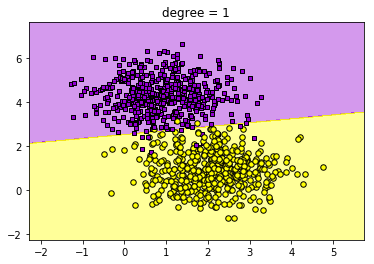

In [187]:
plot_decision(x.values, y.values, h_func, 1)

#### 3.

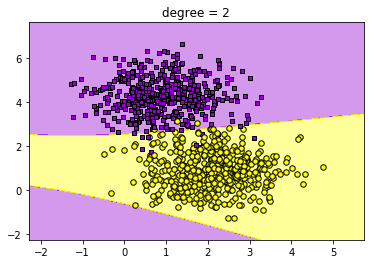

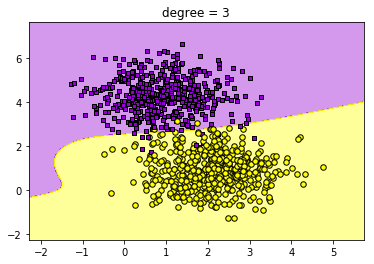

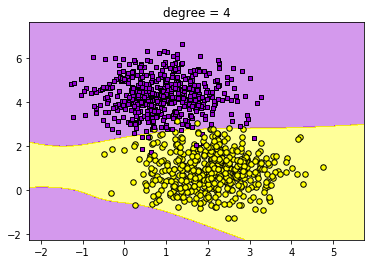

In [188]:
for d in range(2, 5):
    h_func, accur = pocket_perceptron(x_train.values, y_train.values, x_test.values, y_test.values, 100, d)
    plot_decision(x.values, y.values, h_func, d)

### Logistic regression
#### 4.

In [26]:
from sklearn.preprocessing import MinMaxScaler
import random

random.seed(42)

class StochasticGradientDescent:
    def __init__(self, pos_label, num_epochs=600, batch_size=100):
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.pos_label = pos_label
        self.w = None
    
    def grad_part(self):
        return lambda x, y: y * x / (1 + np.exp(y * (self.w @ x)))
    
    def predict(self, x):
        return 1 if (x @ self.w > 0) else 0
    
    def fit(self, x, y):
        x = MinMaxScaler().fit_transform(x)
        y01 = np.array([1 if label == self.pos_label else 0 for label in y])
        
        n, m = x.shape[0], x.shape[1]
        accurs = []
        self.w = np.random.random(m) - 0.5
        
        inds = random.sample(range(0, n), n)
        x = x[inds]
        y01 = y01[inds]
        
        for i in range(self.num_epochs):
            for j in range(0, n, self.batch_size):
                batch_inds = range(j, min(j + self.batch_size, n))
                batch_x, batch_y = x[batch_inds], y01[batch_inds]

                summ = 0

                for elem_x, elem_y in zip(batch_x, batch_y):
                    elem_y = 1 if elem_y == 1 else -1
                    summ += self.grad_part()(elem_x, elem_y)

                self.w -= - summ / self.batch_size
                accur = np.mean(np.array(list(map(lambda x: self.predict(x), x))) == y01)
                accurs.append(accur)
        
        return accurs

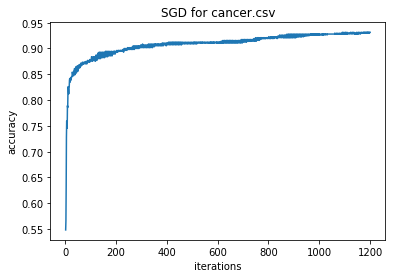

In [329]:
num_epochs = 200

sgd = StochasticGradientDescent(pos_label='M', num_epochs=num_epochs)

x, y = get_dataset(cancer_csv)
accurs = sgd.fit(x.values, y.values)

plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(range(1, len(accurs) + 1), accurs)
    
plt.title("SGD for cancer.csv")
plt.show()

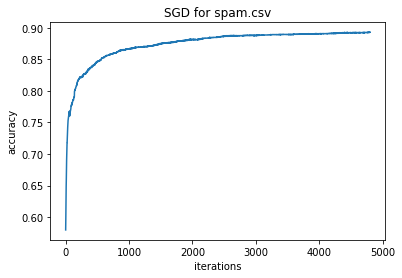

In [330]:
num_epochs = 200
batch_size = 200

sgd = StochasticGradientDescent(pos_label=1, num_epochs=num_epochs, batch_size=batch_size)

x, y = get_dataset(spam_csv)
accurs = sgd.fit(x.values, y.values)

plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.plot(range(1, len(accurs) + 1), accurs)
    
plt.title("SGD for spam.csv")
plt.show()

### Neural networks
#### 5.

In [101]:
import csv
import torch

mnist_shape = (28, 28)
x, y = get_dataset(mnist_csv)
x = x.values
y = y.values

x = x / 255

rx = []    
for row in x:
    reshaped_row = np.reshape(row, mnist_shape)
    rx.append(reshaped_row)

x_mnist = torch.FloatTensor(rx).view(x_mnist.shape[0], 1, mnist_shape[0], mnist_shape[0])
y_mnist = torch.tensor(y)

x_mnist = 2 * x_mnist - 1

print("MNIST: ")
print(x_mnist.shape[0])
print(x_mnist)
print(y_mnist.shape[0])
print(y_mnist)

def train_test_split(x, y):
    x_train, y_train, x_test, y_test = None, None, None, None

    for i in range(0, 10):
        tx = x[y == i]
        ty = y[y == i]

        n = tx.shape[0]

        test_n = int(0.2 * n)
        train_n = n - test_n

        inds = random.sample(range(0, n), n)
        test_inds = inds[0:test_n]
        train_inds = inds[test_n:]

        if x_train is None:
            x_train, y_train = tx[train_inds], ty[train_inds]
            x_test, y_test = tx[test_inds], ty[test_inds]
        else:
            x_train, y_train = np.vstack((x_train, tx[train_inds])), np.hstack((y_train, ty[train_inds]))
            x_test, y_test = np.vstack((x_test, tx[test_inds])), np.hstack((y_test, ty[test_inds]))

    x_train = torch.FloatTensor(x_train).view(x_train.shape[0], 1, img_shape, img_shape)
    x_test = torch.FloatTensor(x_test).view(x_test.shape[0], 1, img_shape, img_shape)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)
    
    return x_train, y_train, x_test, y_test

x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist = train_test_split(x_mnist, y_mnist)
print("Train size for mnist: " + str(x_train_mnist.shape[0]))
print("Test size for mnist: " + str(x_test_mnist.shape[0]))


MNIST: 
10000
tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        ...,


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
  

In [74]:
import os
from PIL import Image
from skimage import io

x_train_notmnist, y_train_notmnist, x_test_notmnist, y_test_notmnist = None, None, None, None
img_shape = 28

dataset_size = 0

for code in range(ord('A'), ord('K')):
    label = code - ord('A')
    letter = chr(code)
    
    tx = []
    for img in Path(os.path.join(notmnist_dir, letter)).iterdir():
        if img.stat().st_size > 0:
            tx.append(io.imread(img))
    tx = np.array(x, dtype=np.float)
    ty = np.array([label] * tx.shape[0])
    
    n = tx.shape[0]
    
    dataset_size += n
    
    test_n = int(0.2 * n)
    train_n = n - test_n
    
    inds = random.sample(range(0, n), n)
    test_inds = inds[0:test_n]
    train_inds = inds[test_n:]
    
    if x_train_notmnist is None:
        x_train_notmnist, y_train_notmnist = tx[train_inds], ty[train_inds]
        x_test_notmnist, y_test_notmnist = tx[test_inds], ty[test_inds]
    else:
        x_train_notmnist, y_train_notmnist = np.vstack((x_train_notmnist, tx[train_inds])), np.hstack((y_train_notmnist, ty[train_inds]))
        x_test_notmnist, y_test_notmnist = np.vstack((x_test_notmnist, tx[test_inds])), np.hstack((y_test_notmnist, ty[test_inds]))

x_train_notmnist = torch.FloatTensor(x_train_notmnist).view(x_train_notmnist.shape[0], 1, img_shape, img_shape)
x_test_notmnist = torch.FloatTensor(x_test_notmnist).view(x_test_notmnist.shape[0], 1, img_shape, img_shape)
y_train_notmnist = torch.LongTensor(y_train_notmnist)
y_test_notmnist = torch.LongTensor(y_test_notmnist)

print("notMNIST size: " + str(dataset_size))
print("Train size for notMNIST: " + str(x_train_notmnist.shape[0]))
print("Test size for notMNIST: " + str(x_test_notmnist.shape[0]))

notMNIST size: 100000
Train size for notMNIST: 80000
Test size for notMNIST: 20000


#### 6.

In [167]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

class NetMnist(nn.Module):
    def __init__(self, criterion, opt):
        super(NetMnist, self).__init__()
        self.criterion = criterion
        self.opt = opt
        
        self.conv1 = nn.Conv2d(1, 8, 3, 1, 1)
        self.conv2 = nn.Conv2d(8, 8, 3, 1, 1)
        self.conv3 = nn.Conv2d(8, 8, 3, 1, 1)
        self.fc1 = nn.Linear(8*28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def fit(self, x, y, lr, epochs, batch_size):      
        optimizer = self.opt(self.parameters(), lr=lr, momentum=0.9)
        
        x_train, y_train, x_val, y_val = train_test_split(x, y)      
        
        opt_loss = float('inf')
        opt_params = []
        
        dataset = TensorDataset(x_train, y_train)
        trainloader = DataLoader(dataset, batch_size=batch_size, shuffle=True) 
        
        for epoch in range(epochs):
            loss = 0.0 
            num = 0
            
            for data in trainloader:
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)                
                loss = self.criterion(outputs, labels)             
                loss.backward()
                optimizer.step()
                
                loss += loss.item()
                num += 1
            
            with torch.no_grad():
                train_loss = loss / num
                val_loss = self.criterion(self(x_val), y_val).item()
                
                if val_loss < opt_loss or len(opt_params) == 0:
                    opt_params = [param.data.clone() for param in self.parameters()]
                    opt_loss = val_loss
                print("EPOCH={}, LOSS: TRAIN={}, VALIDATION={}".format(epoch, train_loss, val_loss))
        
        for i, param in enumerate(self.parameters()):
            param.data = opt_params[i]
        
    def predict(self, x):
        with torch.no_grad():
            y_pred = self(x)
        return torch.max(y_pred, 1)[1]
    
class NetMnistRelu(NetMnist):
    def __init__(self, criterion, opt):
        super(NetMnistRelu, self).__init__(criterion, opt)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = x.view(-1, 8*28*28) 
        x = torch.relu(self.fc1(x)) 
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class NetMnistTanh(NetMnist):
    def __init__(self, criterion, opt):
        super(NetMnistTanh, self).__init__(criterion, opt)
        
    def forward(self, x):
        x = torch.tanh(self.conv1(x))
        x = torch.tanh(self.conv2(x))
        x = torch.tanh(self.conv3(x))
        x = x.view(-1, 8*28*28) 
        x = torch.tanh(self.fc1(x)) 
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
class NetMnistSigmoid(NetMnist):
    def __init__(self, criterion, opt):
        super(NetMnistSigmoid, self).__init__(criterion, opt)
        
    def forward(self, x):
        x = self.conv1(x) 
        x = self.conv2(x) 
        x = self.conv3(x) 
        x = x.view(-1, 8*28*28) 
        x = torch.sigmoid(self.fc1(x)) 
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [151]:
net = NetMnistRelu(nn.CrossEntropyLoss(), optim.SGD)
print("_______________ RELU: _______________")
net.fit(x_train_mnist, y_train_mnist, 0.01, 20, 32)
print("_______________ RESULTS: _______________")
print("TRAIN: {}".format((y_train_mnist == net.predict(x_train_mnist)).sum().item() / x_train_mnist.shape[0]))
print("TEST: {}".format((y_test_mnist == net.predict(x_test_mnist)).sum().item() / x_test_mnist.shape[0]))

_______________ RELU: _______________
EPOCH=0, LOSS: TRAIN=0.009995903819799423, VALIDATION=0.4850022792816162
EPOCH=1, LOSS: TRAIN=0.0003142042551189661, VALIDATION=0.27811703085899353
EPOCH=2, LOSS: TRAIN=0.002090452704578638, VALIDATION=0.24772658944129944
EPOCH=3, LOSS: TRAIN=0.00029996258672326803, VALIDATION=0.16111253201961517
EPOCH=4, LOSS: TRAIN=0.0010750002693384886, VALIDATION=0.1379300206899643
EPOCH=5, LOSS: TRAIN=0.00046225389814935625, VALIDATION=0.19892120361328125
EPOCH=6, LOSS: TRAIN=1.409160518051067e-06, VALIDATION=0.18128514289855957
EPOCH=7, LOSS: TRAIN=2.926261913671624e-06, VALIDATION=0.1608075648546219
EPOCH=8, LOSS: TRAIN=1.5847124814172275e-05, VALIDATION=0.18373000621795654
EPOCH=9, LOSS: TRAIN=1.5979974705260247e-05, VALIDATION=0.18523667752742767
EPOCH=10, LOSS: TRAIN=3.967119118897244e-05, VALIDATION=0.30732423067092896
EPOCH=11, LOSS: TRAIN=9.661883086664602e-05, VALIDATION=0.22632841765880585
EPOCH=12, LOSS: TRAIN=5.539376957131026e-07, VALIDATION=0.183

In [150]:
net = NetMnistTanh(nn.CrossEntropyLoss(), optim.SGD)
print("_______________ TANH: _______________")
net.fit(x_train_mnist, y_train_mnist, 0.01, 20, 32)
print("_______________ RESULTS: _______________")
print("TRAIN: {}".format((y_train_mnist == net.predict(x_train_mnist)).sum().item() / x_train_mnist.shape[0]))
print("TEST: {}".format((y_test_mnist == net.predict(x_test_mnist)).sum().item() / x_test_mnist.shape[0]))

_______________ TANH: _______________
EPOCH=0, LOSS: TRAIN=0.0018157698214054108, VALIDATION=0.2926661968231201
EPOCH=1, LOSS: TRAIN=0.0016796879936009645, VALIDATION=0.25250953435897827
EPOCH=2, LOSS: TRAIN=0.0027282824739813805, VALIDATION=0.19647769629955292
EPOCH=3, LOSS: TRAIN=0.004218480084091425, VALIDATION=0.1579393595457077
EPOCH=4, LOSS: TRAIN=0.0006322208209894598, VALIDATION=0.14294719696044922
EPOCH=5, LOSS: TRAIN=0.0013113413006067276, VALIDATION=0.1297597587108612
EPOCH=6, LOSS: TRAIN=0.0001133715923060663, VALIDATION=0.12119249254465103
EPOCH=7, LOSS: TRAIN=0.0006170361884869635, VALIDATION=0.12045422941446304
EPOCH=8, LOSS: TRAIN=1.7163765733130276e-05, VALIDATION=0.12089710682630539
EPOCH=9, LOSS: TRAIN=4.0325950976694e-05, VALIDATION=0.11531125009059906
EPOCH=10, LOSS: TRAIN=3.4240940294694155e-05, VALIDATION=0.11106305569410324
EPOCH=11, LOSS: TRAIN=4.129267472308129e-05, VALIDATION=0.11214254796504974
EPOCH=12, LOSS: TRAIN=6.995094008743763e-05, VALIDATION=0.111757

In [153]:
net = NetMnistSigmoid(nn.CrossEntropyLoss(), optim.SGD)
print("_______________ SIGMOID: _______________")
net.fit(x_train_mnist, y_train_mnist, 0.01, 20, 32)
print("_______________ RESULTS: _______________")
print("TRAIN: {}".format((y_train_mnist == net.predict(x_train_mnist)).sum().item() / x_train_mnist.shape[0]))
print("TEST: {}".format((y_test_mnist == net.predict(x_test_mnist)).sum().item() / x_test_mnist.shape[0]))

_______________ SIGMOID: _______________
EPOCH=0, LOSS: TRAIN=0.01696391962468624, VALIDATION=1.7788200378417969
EPOCH=1, LOSS: TRAIN=0.008946184068918228, VALIDATION=0.7106223106384277
EPOCH=2, LOSS: TRAIN=0.0077050128020346165, VALIDATION=0.4503203332424164
EPOCH=3, LOSS: TRAIN=0.0027244375087320805, VALIDATION=0.390851229429245
EPOCH=4, LOSS: TRAIN=0.002801327034831047, VALIDATION=0.33409252762794495
EPOCH=5, LOSS: TRAIN=0.0018784413114190102, VALIDATION=0.30290067195892334
EPOCH=6, LOSS: TRAIN=0.010126595385372639, VALIDATION=0.27523502707481384
EPOCH=7, LOSS: TRAIN=0.0010408287635073066, VALIDATION=0.2444239854812622
EPOCH=8, LOSS: TRAIN=0.0045240698382258415, VALIDATION=0.24011360108852386
EPOCH=9, LOSS: TRAIN=0.0029370307456701994, VALIDATION=0.22741347551345825
EPOCH=10, LOSS: TRAIN=0.0044961730018258095, VALIDATION=0.21062761545181274
EPOCH=11, LOSS: TRAIN=0.00018532300600782037, VALIDATION=0.21018867194652557
EPOCH=12, LOSS: TRAIN=0.0013483341317623854, VALIDATION=0.202763631